# **Shapely Meetodite Loetelu**

**Geomeetria objektid** (Point, LineString, Polygon jne) tuleb kõigepealt luua ja neid kasutatakse meetodite rakendamiseks.

**Transformatsioonid** (scale, rotate, translate) rakendatakse loodud geomeetriale, mis tähendab, et peate esmalt määratlema mingi geomeetria objekti.

In [ ]:
# --- Shapely Meetodite Loetelu ---

# Geomeetria loomine
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon, GeometryCollection

# Geomeetrilised operatsioonid
from shapely.ops import unary_union, nearest_points, cascaded_union, split, snap, linemerge

# --- Geomeetrilised Meetodid ---

# Intersect/Union/Distance
intersect = geom1.intersection(geom2)      # Leiab kahe geomeetria lõikepunkti
union = geom1.union(geom2)                 # Leiab kahe geomeetria ühenduse
difference = geom1.difference(geom2)       # Leiab geomeetrilise erinevuse
symmetric_difference = geom1.symmetric_difference(geom2)  # Leiab sümmeetrilise erinevuse
distance = geom1.distance(geom2)           # Arvutab kahe geomeetria vahelise kauguse

# Lihtsustamine ja simplifikatsioon
simplified = geom.simplify(tolerance)      # Lihtsustab geomeetriat määratud tolerantsiga

# Kõveruste ja piiride arvutamine
length = line.length                       # Arvutab joone pikkuse
area = polygon.area                        # Arvutab polügooni pindala
boundary = geom.boundary                   # Tagastab geomeetria piiri kui joon

# Kontrollpunktid geomeetrias
contains = geom1.contains(geom2)           # Kontrollib, kas geom1 sisaldab geom2
within = geom1.within(geom2)               # Kontrollib, kas geom1 on geom2 sees
crosses = geom1.crosses(geom2)             # Kontrollib, kas geom1 ristub geom2-ga
touches = geom1.touches(geom2)             # Kontrollib, kas geom1 puutub geom2
overlaps = geom1.overlaps(geom2)           # Kontrollib, kas geom1 kattub geom2-ga
equals = geom1.equals(geom2)               # Kontrollib, kas geom1 on geom2-ga võrdne
disjoint = geom1.disjoint(geom2)           # Kontrollib, kas geom1 ja geom2 on lahus

# --- Transformatsioonid ---

from shapely.affinity import scale, rotate, translate

# Skaaleerimine (mastaapimine)
scaled_geom = scale(geom, xfact=2, yfact=1, origin='center')  # Skaaleerib geom 2x laiemaks ja ei muuda kõrgust

# Pööramine
rotated_geom = rotate(geom, angle=45, origin='centroid')      # Pöörab geom-i 45 kraadi ümber tsentroidi

# Nihutamine (transleerimine)
translated_geom = translate(geom, xoff=10, yoff=5)            # Nihutab geom-i 10 ühikut paremale ja 5 ühikut üles

# --- Täpsemad Operatsioonid ja Kontrollid ---

# Kõige lähemate punktide leidmine
nearest_pt = nearest_points(geom1, geom2)                     # Leiab geom1 ja geom2 kõige lähemad punktid

# Geomeetria lõhkumine
split_geom = split(geom, cutter)                              # Lõikab geom teise geomeetriaga (nt joon)

# Liitmine
merged_geom = linemerge([line1, line2])                       # Liidab kaks või enam joont üheks

# Snap ehk täpsuse parandamine
snapped_geom = snap(geom1, geom2, tolerance)                  # Snäpib geom1 geom2-le määratud tolerantsusega

# Mitmete geomeetrite liitmine
united_geom = unary_union([geom1, geom2, geom3])              # Liidab mitu geomeetriat üheks

# --- Muud Meetodid ---

# Katvus (buffer)
buffered_geom = geom.buffer(distance)                         # Loob geom-i ümber puhvri määratud kaugusega

# Koordinaatide pööramine
rotated_geom = geom.exterior.rotate(angle=90, origin=(0, 0))  # Pöörab geom-i määratud nurga ümber päritolu


# Picki Teoreem

Polügooni pindala: 8.0
Sisepunktide arv: 7
Piiripunktide arv: 4


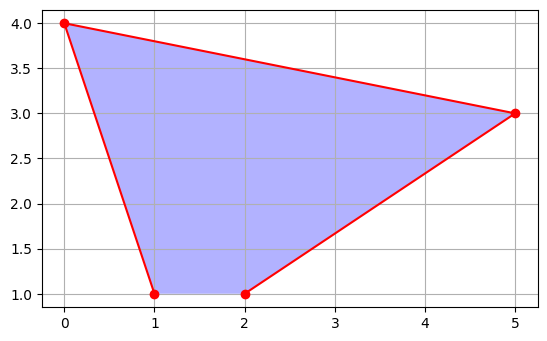

In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

def pick_theorem(polygon_coords):
    # Loome polügooni Shapely teegi abil
    polygon = Polygon(polygon_coords)

    # Leiame piiripunktide ja sisepunktide arvu
    boundary_points = 0
    interior_points = 0

    min_x, min_y, max_x, max_y = polygon.bounds

    # Kontrollime kõiki punkte, mis jäävad polügooni sisse või servale
    for x in range(int(min_x), int(max_x) + 1):
        for y in range(int(min_y), int(max_y) + 1):
            point = Point(x, y)
            if polygon.touches(point):
                boundary_points += 1
            elif polygon.contains(point):
                interior_points += 1

    # Kasutame Picki teoreemi
    area = interior_points + boundary_points / 2 - 1

    return area, interior_points, boundary_points

# Näide polügooni punktidest (ruudustikulised koordinaadid)
polygon_coords = [(1, 1), (0, 4), (5, 3), (2,1)]

# Arvutame pindala Picki teoreemi abil
area, interior_points, boundary_points = pick_theorem(polygon_coords)

print(f"Polügooni pindala: {area}")
print(f"Sisepunktide arv: {interior_points}")
print(f"Piiripunktide arv: {boundary_points}")

# Joonistame polügooni
x, y = zip(*polygon_coords)
plt.fill(x, y, 'b', alpha=0.3)
plt.plot(x, y, 'ro-')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Juhuslike Punktide Genereerimine ja Hulknurgad

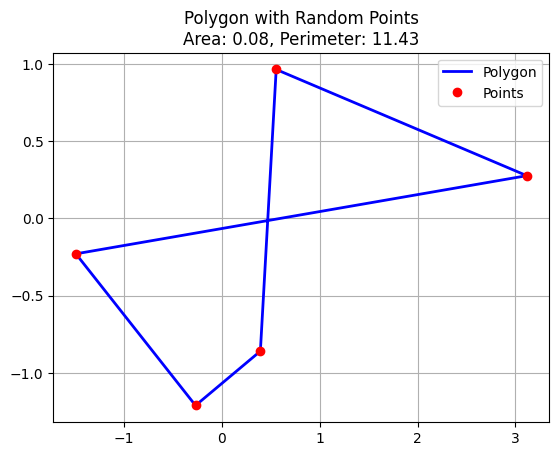

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

# Juhuslike punktide genereerimine normaaljaotuse järgi
N = 5
points = np.random.normal(loc=0, scale=1, size=(N, 2))

# Moodustame polügooni
polygon = Polygon(points)

# Arvutame pindala ja ümbermõõdu
area = polygon.area
perimeter = polygon.length

# Visualiseerime punktid ja polügooni
fig, ax = plt.subplots()

# Joonistame polügooni
x, y = polygon.exterior.xy
ax.plot(x, y, 'b-', linewidth=2, label='Polygon')

# Joonistame punktid
ax.plot(points[:, 0], points[:, 1], 'ro', label='Points')

# Lisame tiitli ja legendi
plt.title(f'Polygon with Random Points\nArea: {area:.2f}, Perimeter: {perimeter:.2f}')
plt.legend()
plt.grid(True)
plt.show()


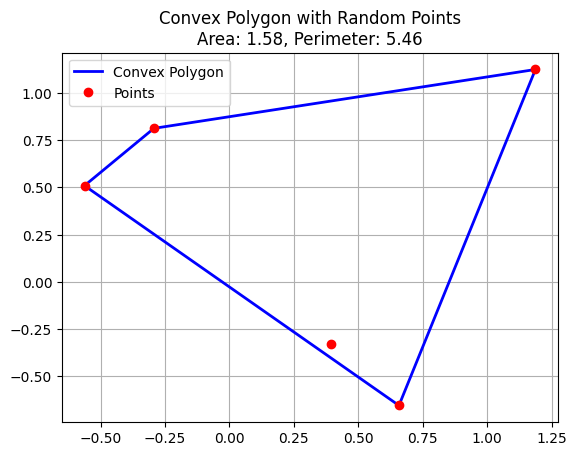

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, MultiPoint

# Juhuslike punktide genereerimine normaaljaotuse järgi
N = 5
points = np.random.normal(loc=0, scale=1, size=(N, 2))

# Muudame punktid MultiPoint objektiks
multi_point = MultiPoint([Point(p) for p in points])

# Moodustame kumer polügooni (convex hull)
convex_polygon = multi_point.convex_hull

# Arvutame pindala ja ümbermõõdu
area = convex_polygon.area
perimeter = convex_polygon.length

# Visualiseerime punktid ja polügooni
fig, ax = plt.subplots()

# Joonistame kumerpolügooni
x, y = convex_polygon.exterior.xy
ax.plot(x, y, 'b-', linewidth=2, label='Convex Polygon')

# Joonistame punktid
ax.plot(points[:, 0], points[:, 1], 'ro', label='Points')

# Lisame tiitli ja legendi
plt.title(f'Convex Polygon with Random Points\nArea: {area:.2f}, Perimeter: {perimeter:.2f}')
plt.legend()
plt.grid(True)
plt.show()


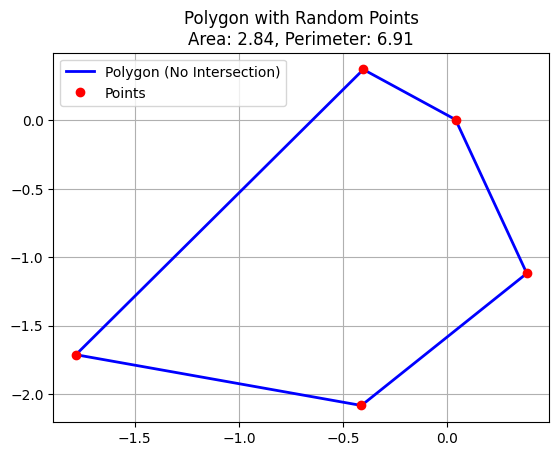

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

# Juhuslike punktide genereerimine normaaljaotuse järgi
N = 5
points = np.random.normal(loc=0, scale=1, size=(N, 2))

# Keskpunkti arvutamine (kasutame punktide keskmist)
centroid = np.mean(points, axis=0)

# Punktide sorteerimine vastavalt nende nurgale keskpunkti suhtes
angles = np.arctan2(points[:, 1] - centroid[1], points[:, 0] - centroid[0])
sorted_points = points[np.argsort(angles)]

# Moodustame polügooni
polygon = Polygon(sorted_points)

# Arvutame pindala ja ümbermõõdu
area = polygon.area
perimeter = polygon.length

# Visualiseerime punktid ja polügooni
fig, ax = plt.subplots()

# Joonistame polügooni
x, y = polygon.exterior.xy
ax.plot(x, y, 'b-', linewidth=2, label='Polygon (No Intersection)')

# Joonistame punktid
ax.plot(points[:, 0], points[:, 1], 'ro', label='Points')

# Lisame tiitli ja legendi
plt.title(f'Polygon with Random Points\nArea: {area:.2f}, Perimeter: {perimeter:.2f}')
plt.legend()
plt.grid(True)
plt.show()


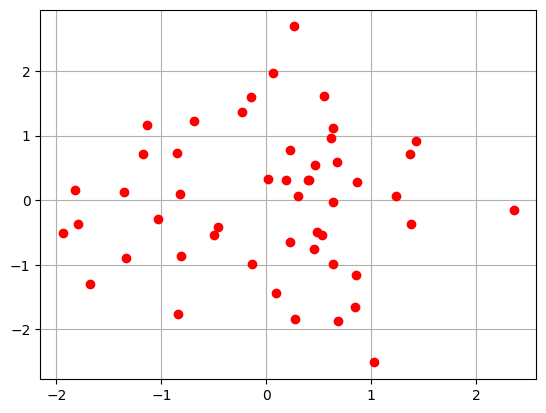

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

# Juhuslike punktide genereerimine normaaljaotuse järgi
N = 50
points = np.random.normal(loc=0, scale=1, size=(N, 2))

# Moodustame polügooni
polygon = Polygon(points)

# Visualiseerime punktid ja polügooni
fig, ax = plt.subplots()

# Joonistame punktid
ax.plot(points[:, 0], points[:, 1], 'ro', label='Points')

plt.grid(True)
plt.show()

Selle ringi keskpunkti koordinaadid leitakse, kasutades kõigi punktide keskmist.

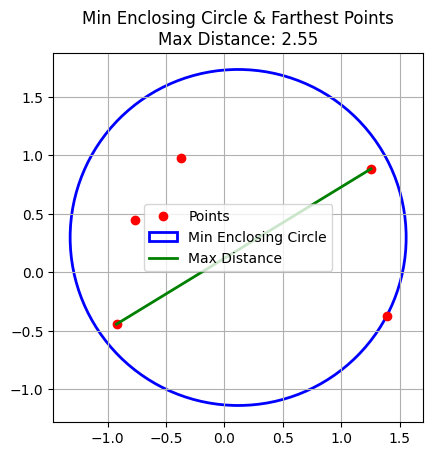

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from shapely.geometry import MultiPoint, Point
from scipy.spatial import ConvexHull

# Juhuslike punktide genereerimine normaaljaotuse järgi
N = 5
points = np.random.normal(loc=0, scale=1, size=(N, 2))

# Vähima raadiusega ringi (minimum enclosing circle) leidmine
def min_enclosing_circle(points):
    multi_point = MultiPoint([Point(p) for p in points])
    # ConvexHull määratleb hulknurga, mille külgede vahele jäävad kõik punktid
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]

    # Leia keskpunkt ja raadius, kasutades ConvexHull-i punkte
    center = Point(hull_points.mean(axis=0))
    radius = max(center.distance(Point(p)) for p in hull_points)

    return center, radius

center, radius = min_enclosing_circle(points)

# Kahe kõige kaugema punkti leidmine
dist_matrix = distance_matrix(points, points)
i, j = np.unravel_index(np.argmax(dist_matrix), dist_matrix.shape)
farthest_points = points[i], points[j]
max_distance = dist_matrix[i, j]

# Visualiseerime punktid, vähima raadiusega ringi ja kõige kaugemad punktid
fig, ax = plt.subplots()

# Joonistame punktid
ax.plot(points[:, 0], points[:, 1], 'ro', label='Points')

# Joonistame vähima raadiusega ringi
circle = plt.Circle((center.x, center.y), radius, color='blue', fill=False, linewidth=2, label='Min Enclosing Circle')
ax.add_artist(circle)

# Joonistame kõige kaugemad punktid ja nende vahelise joone
ax.plot([farthest_points[0][0], farthest_points[1][0]], [farthest_points[0][1], farthest_points[1][1]], 'g-', linewidth=2, label='Max Distance')

# Kohandame telje piire nii, et kogu ring oleks nähtav
buffer = 1.1 * radius
ax.set_xlim(center.x - buffer, center.x + buffer)
ax.set_ylim(center.y - buffer, center.y + buffer)

# Lisame tiitli ja legendi
plt.title(f'Min Enclosing Circle & Farthest Points\nMax Distance: {max_distance:.2f}')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


In [11]:
!pip install miniball

  Preparing metadata (setup.py) ... done
  Created wheel for miniball: filename=miniball-1.2.0-py3-none-any.whl size=5440 sha256=98417bbc07eae64471ba7b632a331619219ad72ba29f8d18edde737ec59d35f7
  Stored in directory: /root/.cache/pip/wheels/63/e2/d6/071886115d21b4c6781fface5de13b0aacf548355a799d4143
Successfully built miniball


# Welzl’i algoritm
minimaalne ümbritsev ring (minimum enclosing circle)

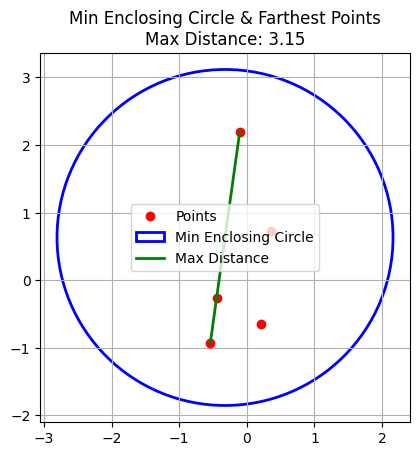

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from miniball import get_bounding_ball

# Juhuslike punktide genereerimine normaaljaotuse järgi
N = 5
points = np.random.normal(loc=0, scale=1, size=(N, 2))

# Leidke minimaalne ümbritsev ring kasutades miniball paketti
center, radius = get_bounding_ball(points)

# Kahe kõige kaugema punkti leidmine
dist_matrix = distance_matrix(points, points)
i, j = np.unravel_index(np.argmax(dist_matrix), dist_matrix.shape)
farthest_points = points[i], points[j]
max_distance = dist_matrix[i, j]

# Visualiseerime punktid, vähima raadiusega ringi ja kõige kaugemad punktid
fig, ax = plt.subplots()

# Joonistame punktid
ax.plot(points[:, 0], points[:, 1], 'ro', label='Points')

# Joonistame vähima raadiusega ringi
circle = plt.Circle(center, radius, color='blue', fill=False, linewidth=2, label='Min Enclosing Circle')
ax.add_artist(circle)

# Joonistame kõige kaugemad punktid ja nende vahelise joone
ax.plot([farthest_points[0][0], farthest_points[1][0]], [farthest_points[0][1], farthest_points[1][1]], 'g-', linewidth=2, label='Max Distance')

# Kohandame telje piire nii, et kogu ring oleks nähtav
buffer = 1.1 * radius
ax.set_xlim(center[0] - buffer, center[0] + buffer)
ax.set_ylim(center[1] - buffer, center[1] + buffer)

# Lisame tiitli ja legendi
plt.title(f'Min Enclosing Circle & Farthest Points\nMax Distance: {max_distance:.2f}')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


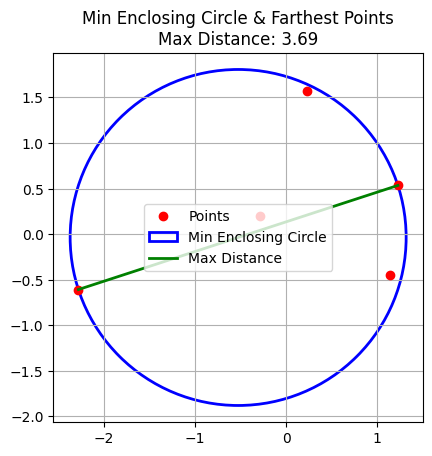

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, distance_matrix
import math

# Punktide genereerimine normaaljaotuse järgi
N = 5
points = np.random.normal(loc=0, scale=1, size=(N, 2))

def welzl(P, R=[]):
    if len(P) == 0 or len(R) == 3:
        if len(R) == 0:
            return np.zeros(2), 0
        elif len(R) == 1:
            return R[0], 0
        elif len(R) == 2:
            center = (R[0] + R[1]) / 2
            radius = np.linalg.norm(R[0] - center)
            return center, radius
        elif len(R) == 3:
            A, B, C = R
            AB_mid = (A + B) / 2
            BC_mid = (B + C) / 2

            AB_slope = np.inf if A[0] == B[0] else (A[1] - B[1]) / (A[0] - B[0])
            BC_slope = np.inf if B[0] == C[0] else (B[1] - C[1]) / (B[0] - C[0])

            AB_perp_slope = -1 / AB_slope if AB_slope != 0 else np.inf
            BC_perp_slope = -1 / BC_slope if BC_slope != 0 else np.inf

            if AB_perp_slope == np.inf:
                center_x = AB_mid[0]
                center_y = BC_mid[1] + BC_perp_slope * (center_x - BC_mid[0])
            elif BC_perp_slope == np.inf:
                center_x = BC_mid[0]
                center_y = AB_mid[1] + AB_perp_slope * (center_x - AB_mid[0])
            else:
                center_x = (AB_perp_slope * AB_mid[0] - BC_perp_slope * BC_mid[0] + BC_mid[1] - AB_mid[1]) / (AB_perp_slope - BC_perp_slope)
                center_y = AB_mid[1] + AB_perp_slope * (center_x - AB_mid[0])

            center = np.array([center_x, center_y])
            radius = np.linalg.norm(A - center)
            return center, radius

    p = P[-1]
    P = P[:-1]
    center, radius = welzl(P, R)

    if np.linalg.norm(p - center) <= radius:
        return center, radius

    return welzl(P, R + [p])

center, radius = welzl(list(points))

# Kahe kõige kaugema punkti leidmine
dist_matrix = distance_matrix(points, points)
i, j = np.unravel_index(np.argmax(dist_matrix), dist_matrix.shape)
farthest_points = points[i], points[j]
max_distance = dist_matrix[i, j]

# Visualiseerime punktid, vähima raadiusega ringi ja kõige kaugemad punktid
fig, ax = plt.subplots()

# Joonistame punktid
ax.plot(points[:, 0], points[:, 1], 'ro', label='Points')

# Joonistame vähima raadiusega ringi
circle = plt.Circle(center, radius, color='blue', fill=False, linewidth=2, label='Min Enclosing Circle')
ax.add_artist(circle)

# Joonistame kõige kaugemad punktid ja nende vahelise joone
ax.plot([farthest_points[0][0], farthest_points[1][0]], [farthest_points[0][1], farthest_points[1][1]], 'g-', linewidth=2, label='Max Distance')

# Kohandame telje piire nii, et kogu ring oleks nähtav
buffer = 1.1 * radius
ax.set_xlim(center[0] - buffer, center[0] + buffer)
ax.set_ylim(center[1] - buffer, center[1] + buffer)

# Lisame tiitli ja legendi
plt.title(f'Min Enclosing Circle & Farthest Points\nMax Distance: {max_distance:.2f}')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()
